In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [209]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\Twitter_Data.csv\Twitter_Data.csv")
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [210]:
data.isnull().sum()

clean_text    4
category      7
dtype: int64

In [211]:
data.dropna(how='any',inplace=True)
data.isnull().sum()

clean_text    0
category      0
dtype: int64

 NLP in Sentiment Analysis

In [212]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#Intialize stopwords and stemmer
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

#Text Preprocessing Define text cleaning function
def clean_text(text):
    
    # remove URLs, mentions, hashtags, punctuations
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", '', str(text))  
    text = text.lower()#Lowercasing
    
    #Tokenization
    tokens=nltk.word_tokenize(text)

#Remove stopwords and apply stemming
    cleaned=[stemmer.stem(word) for word in tokens if word not in stop_words and len(word)>2]
    return " ".join(cleaned)
#Apply function to new column
data['clean text']=data['clean_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [213]:
data.columns

Index(['clean_text', 'category', 'clean text'], dtype='object')

In [214]:
data.isnull().sum()

clean_text    0
category      0
clean text    0
dtype: int64

In [215]:
data[['clean_text','clean text']].head()

,clean_text,clean text
0,when modi promised “minimum government maximum...,modi promis minimum govern maximum govern expe...
1,talk all the nonsense and continue all the dra...,talk nonsens continu drama vote modi
2,what did just say vote for modi welcome bjp t...,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,answer among power world leader today trump pu...


In [216]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [249]:
X_text=data['clean text']
X=data['clean text']
y=data['category']


In [251]:
X_train,X_test,X_train_text,X_test_text,y_train,y_test=train_test_split(X,X_text,y,test_size=0.2,random_state=42)

In [254]:
#TF-IDF (Term Frequency-Inverse Document Frequency)
vectorizer=TfidfVectorizer(max_features=5000)
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [255]:
print("Feature matrix shape:",X.shape)
print("Target vector shape:",y.shape)


Feature matrix shape: (162969,)
Target vector shape: (162969,)


In [259]:
model=MultinomialNB()
model.fit(X_train_vec,y_train)
y_pred=model.predict(X_test_vec)
print(classification_report(y_test,y_pred))
print("Accuracy",accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

        -1.0       0.84      0.38      0.53      7152
         0.0       0.78      0.60      0.68     11067
         1.0       0.63      0.90      0.74     14375

    accuracy                           0.69     32594
   macro avg       0.75      0.63      0.65     32594
weighted avg       0.72      0.69      0.67     32594

Accuracy 68.7058967908204


In [262]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr)*100)
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 84.40203718475793
              precision    recall  f1-score   support

        -1.0       0.82      0.72      0.77      7152
         0.0       0.82      0.91      0.86     11067
         1.0       0.88      0.85      0.87     14375

    accuracy                           0.84     32594
   macro avg       0.84      0.83      0.83     32594
weighted avg       0.84      0.84      0.84     32594



In [264]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train_vec, y_train)

y_pred_svm = svm_model.predict(X_test_vec)

print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm)*100)
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 85.11075658096581
              precision    recall  f1-score   support

        -1.0       0.82      0.75      0.78      7152
         0.0       0.83      0.91      0.87     11067
         1.0       0.89      0.85      0.87     14375

    accuracy                           0.85     32594
   macro avg       0.84      0.84      0.84     32594
weighted avg       0.85      0.85      0.85     32594



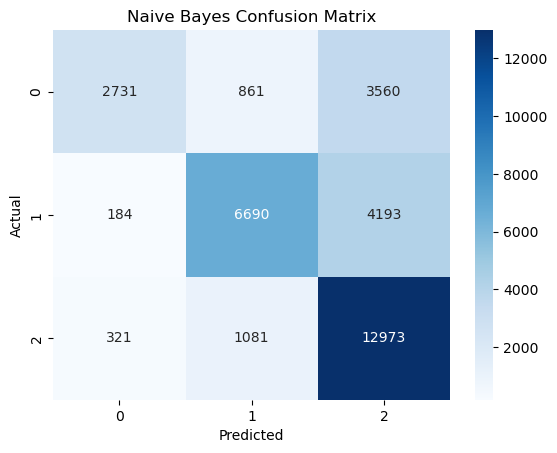

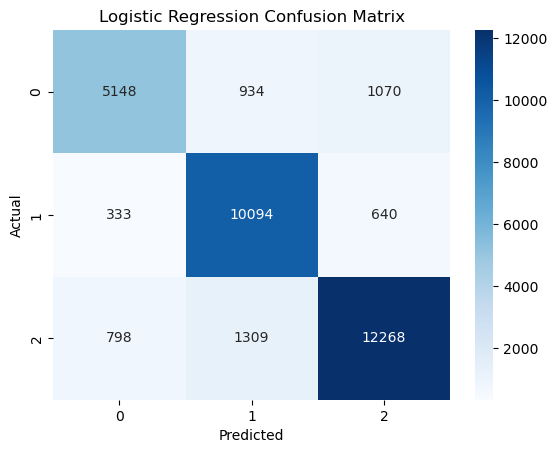

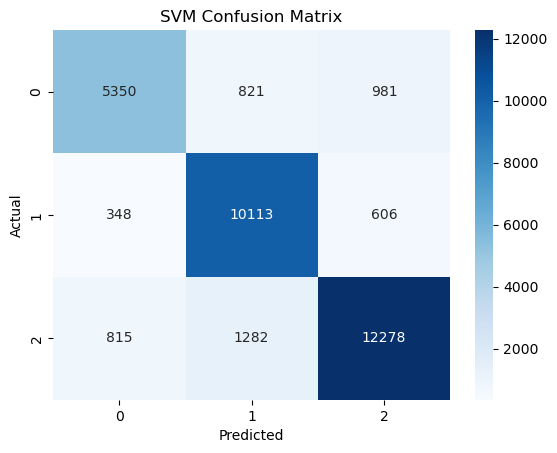

In [265]:
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(y_test, y_pred, "Naive Bayes")
plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_svm, "SVM")


In [229]:
data['clean text'].head()

0    modi promis minimum govern maximum govern expe...
1                 talk nonsens continu drama vote modi
2    say vote modi welcom bjp told rahul main campa...
3    ask support prefix chowkidar name modi great s...
4    answer among power world leader today trump pu...
Name: clean text, dtype: object

In [266]:
wrong_predictions=X_test[y_pred!=y_test]
wrong_data=pd.DataFrame({
    'Original Text':X_test.reset_index(drop=True),
    'Actual Sentiment':y_test.reset_index(drop=True),
    'Predicted Sentimemt':pd.Series(y_pred)
})

In [267]:
wrong_data=wrong_data[wrong_data['Actual Sentiment']!=wrong_data['Predicted Sentimemt']]
wrong_data.head()

,Original Text,Actual Sentiment,Predicted Sentimemt
0,news flash modi address nation cancel trip atm,0.0,1.0
1,accord congress ecosystem bjp divid hous peopl...,1.0,0.0
2,friend gut let drdo test modi pleas explain pr...,-1.0,1.0
3,modi violat model code conduct speak arm forc ...,-1.0,0.0
5,modi govern peopl bought cast system past gove...,-1.0,1.0


 Distribution of sentiment classes

Text(0.5, 1.0, 'Sentiment Distribution')

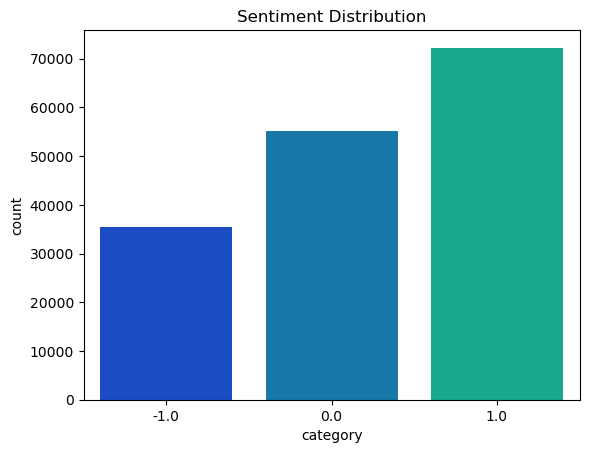

In [ ]:
sns.countplot(data=data,x='category',palette='winter')
plt.title('Sentiment Distribution')

 Word Cloud for each sentiment

In [ ]:
!pip install wordcloud


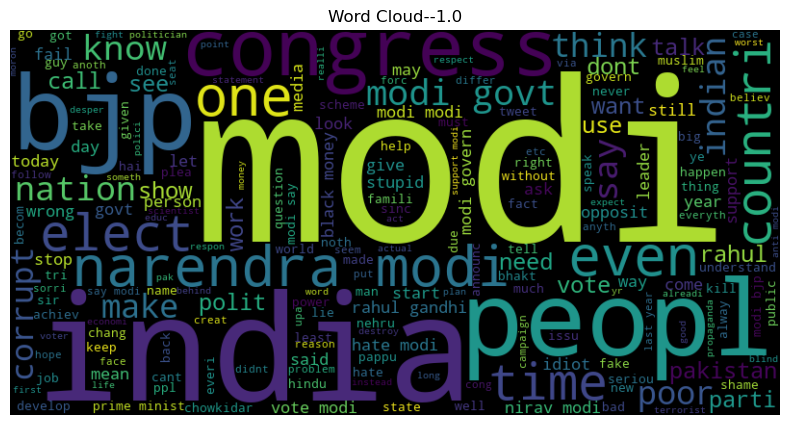

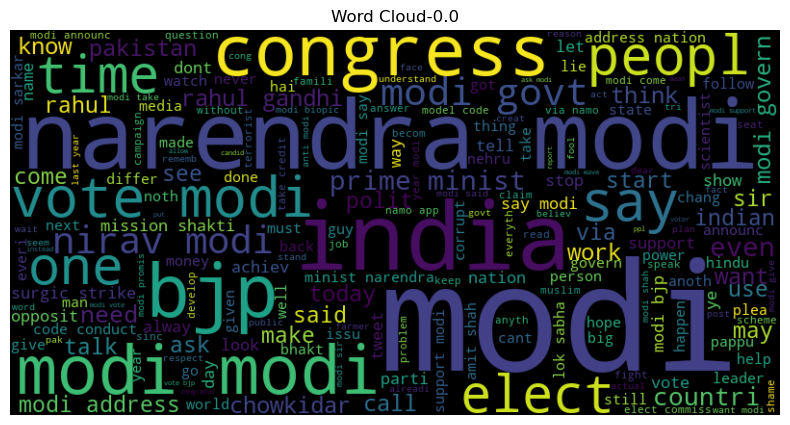

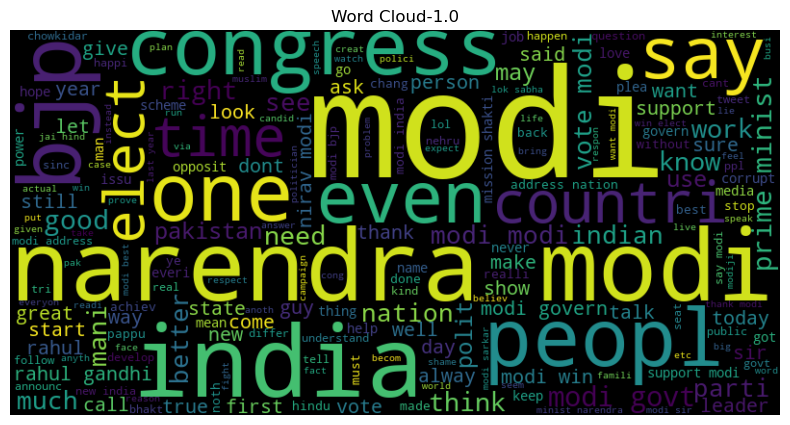

In [ ]:
from wordcloud import WordCloud
for sentiment in data['category'].unique():
    text=" ".join(data[data['category']==sentiment]['clean text'])
    wc=WordCloud(width=800,height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud-{sentiment}")
    plt.show()